In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

im1 = cv2.imread("aber/90__100.png", cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread("aber/con_los_dos.png", cv2.IMREAD_GRAYSCALE)
im3 = cv2.imread("aber/Reference__100.png", cv2.IMREAD_GRAYSCALE)
im4 = (im1.astype(np.float64)+im3.astype(np.float64))
im4 = im4/im4.max()*255
im4 = cv2.imread("aber/haciendo_sin_linear_pol_antes_del_lambd4_a_ojo.png", cv2.IMREAD_GRAYSCALE)

In [12]:
im1 = cv2.imread("/media/melanie/D459-5113/TRAIN/IM_0_phiCR_-1.0577003955841064_Noisy.png", cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread("/media/melanie/D459-5113/TRAIN/IM_0_phiCR_-1.0577003955841064_Non_noisy.png", cv2.IMREAD_GRAYSCALE)
im3 = cv2.imread("/media/melanie/D459-5113/TRAIN/IM_3_phiCR_-3.0919551849365234_Noisy.png", cv2.IMREAD_GRAYSCALE)
im4 = cv2.imread("/media/melanie/D459-5113/TRAIN/IM_3_phiCR_-3.0919551849365234_Non_noisy.png", cv2.IMREAD_GRAYSCALE)

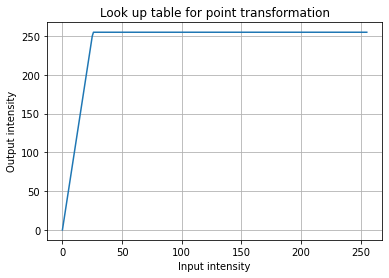

In [42]:
lut = np.arange(256)/255
lut = np.where(lut<0.1, lut, 0.1)/0.1*255
plt.plot(lut)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.title("Look up table for point transformation")
plt.grid()
plt.show()

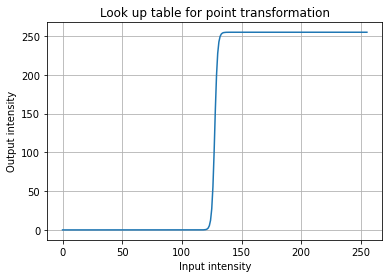

In [3]:
k=0.85
cent=255*0.5
lut = 255/(1+np.exp(-k*(np.arange(256)-cent)))
plt.plot(lut)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.title("Look up table for point transformation")
plt.grid()
plt.show()

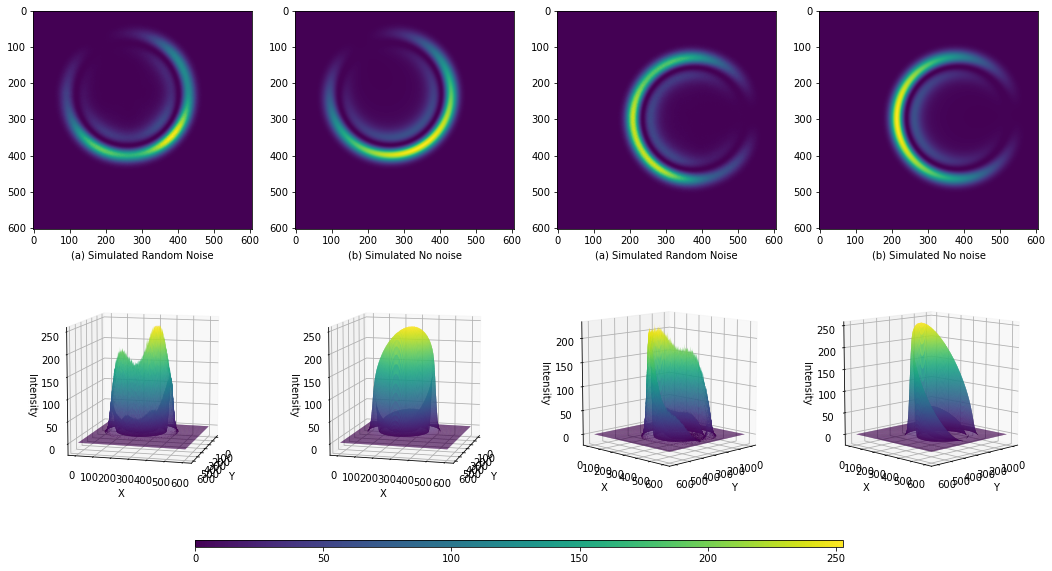

In [17]:
plot3d_resolution=0.7

#%matplotlib notebook
fig = plt.figure(figsize=(4*4.5, 2*4.5))
axes=fig.subplots(2,4)
for i,(im,l,theta) in enumerate(zip([im1,im2,im3, im4], ['(a) Simulated Random Noise','(b) Simulated No noise','(a) Simulated Random Noise', '(b) Simulated No noise'],[15,15,45, 45])):
    #im = (255*(im/im.max())).astype(np.uint8)
    #im=lut[im].astype(np.uint8)
    #im = (im/im.max())
    #thr=0.1
    #im = np.where(im<thr, im, thr)/thr
    prof_x=np.sum(im, axis=0)
    prof_y=np.sum(im, axis=1)

    cm=axes[0, i].imshow(im, cmap='viridis')
    #axes[0,0].grid(True)
    
    axes[0,i].set_xlabel(l)
    #axes[0,i].set_ylabel("y (pixels)")
    axes[1,i].set_visible(False)
    ax = fig.add_subplot(2, 4, i+5, projection='3d')
    X,Y = np.meshgrid(np.arange(len(prof_y)),np.arange(len(prof_x)))
    #fig.suptitle(f"Intesity Profiles for Image\n{image_full_path.split('/')[-1]}")
    files_for_gif=[]
    
    #theta=25
    phi=30
    ax.plot_surface(X, Y, im.T, rcount=int(len(prof_y)*plot3d_resolution), ccount=int(len(prof_x)*plot3d_resolution), cmap='viridis') # rstride=1, cstride=1, linewidth=0
    #cset = ax.contourf(X, Y, im, 2, zdir='z', offset=-20, cmap='viridis', alpha=0.5)
    #cset = ax.contourf(X, Y, im, 1, zdir='x', offset=-8, cmap='viridis')
    #cset = ax.contourf(X, Y, im, 1, zdir='y', offset=0, cmap='viridis')
    ax.set_xlabel('Y')
    #ax.set_xlim(-8, 8)
    ax.set_ylabel('X')
    #ax.set_ylim(-10, 8)
    ax.set_zlabel('Intensity')
    ax.set_zlim(-0.078*np.max(im), np.max(im))
    #ax.set_title(l)
    ax.view_init(10, theta)
    #ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.3, 1.3, 1.3, 1]))
cbax=fig.add_axes([0.25,0.05,0.5,0.01])
fig.colorbar(cm, ax=axes[0,0], cax=cbax, orientation='horizontal')
fig.savefig(f"Dulantzi.png")
#plt.show()

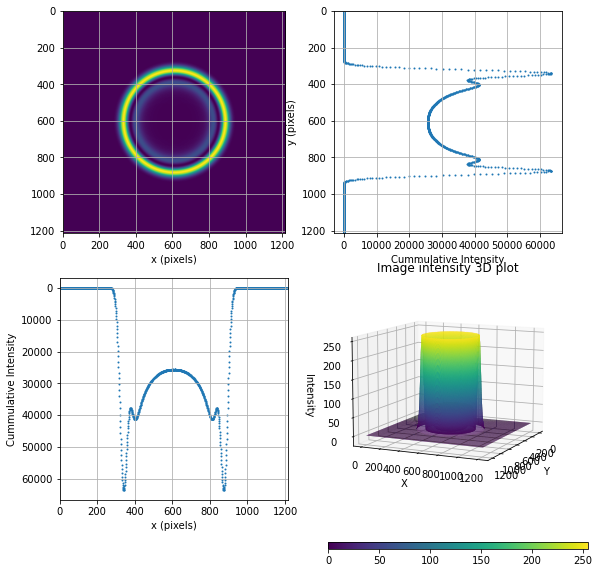

Error in callback <function flush_figures at 0x7fba80be12f0> (for post_execute):


KeyboardInterrupt: 

In [3]:
plot3d_resolution=0.7

#%matplotlib notebook
for k,im in enumerate([im1,im2,im3]):
    prof_x=np.sum(im, axis=0)
    prof_y=np.sum(im, axis=1)
    fig = plt.figure(figsize=(2*4.5, 2*4.5))
    axes=fig.subplots(2,2)
    cm=axes[0, 0].imshow(im, cmap='viridis')
    axes[0,0].grid(True)
    axes[0,1].scatter(prof_y, np.arange(len(prof_y)), s=1, label=f'Intensity profile in y')
    axes[0,1].set_ylim((0,len(prof_y)))
    axes[0,1].invert_yaxis()
    axes[1,0].scatter(np.arange(len(prof_x)), prof_x, s=1, label=f'Intensity profile in y')
    axes[1,0].set_xlim((0,len(prof_x)))
    axes[1,0].invert_yaxis()
    axes[0,0].set_xlabel("x (pixels)")
    #axes[0,0].set_ylabel("y (pixels)")
    axes[0,1].set_xlabel("Cummulative Intensity")
    axes[0,1].set_ylabel("y (pixels)")
    axes[1,0].set_ylabel("Cummulative Intensity")
    axes[1,0].set_xlabel("x (pixels)")
    axes[1,0].grid(True)
    axes[0,1].grid(True)
    axes[1,1].set_visible(False)
    ax = fig.add_subplot(224, projection='3d')
    X,Y = np.meshgrid(np.arange(len(prof_y)),np.arange(len(prof_x)))
    #fig.suptitle(f"Intesity Profiles for Image\n{image_full_path.split('/')[-1]}")
    files_for_gif=[]
    cbax=fig.add_axes([0.54,0.05,0.4,0.01])
    fig.colorbar(cm, ax=axes[0,0], cax=cbax, orientation='horizontal')
    theta=25
    phi=30
    ax.plot_surface(X, Y, im.T, rcount=int(len(prof_y)*plot3d_resolution), ccount=int(len(prof_x)*plot3d_resolution), cmap='viridis') # rstride=1, cstride=1, linewidth=0
    #cset = ax.contourf(X, Y, im, 2, zdir='z', offset=-20, cmap='viridis', alpha=0.5)
    #cset = ax.contourf(X, Y, im, 1, zdir='x', offset=-8, cmap='viridis')
    #cset = ax.contourf(X, Y, im, 1, zdir='y', offset=0, cmap='viridis')
    ax.set_xlabel('Y')
    #ax.set_xlim(-8, 8)
    ax.set_ylabel('X')
    #ax.set_ylim(-10, 8)
    ax.set_zlabel('Intensity')
    ax.set_zlim(-0.078*np.max(im), np.max(im))
    ax.set_title("Image intensity 3D plot")
    ax.view_init(10, theta)
    #ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.3, 1.3, 1.3, 1]))
    fig.savefig(f"Dulantzi_{k}.png")
    #plt.show()

In [1]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, Sampler, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

assert torch.cuda.is_available(), "GPU is not enabled"

# use gpu if available
#device="cpu"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

'''
La idea es que cada 5 epochs, se cambie el dataset efectivo, que sera un subset de los R0,w0,Z posibles
multiplicado por el batch size (phiCR posibles). En cada batch, las imagenes enviadas seran todas
de un mismo D matrix (R0,w0,Z) con diferentes angulos elegidos aleatoriamente con una uniforme
'''
class R0_w0_Z_Sampler(Sampler):
    def __init__(self, R0_weights, w0_weights, Z_weights, num_batches_per_epoch):
        self.num_batches = num_batches_per_epoch
        self.R0_weights = R0_weights
        self.w0_weights = w0_weights
        self.Z_weights = Z_weights

    def __iter__(self):
        return iter(torch.stack((
            torch.multinomial(self.R0_weights, self.num_batches, replacement=True),
            torch.multinomial(self.w0_weights, self.num_batches, replacement=True),
            torch.multinomial(self.Z_weights, self.num_batches, replacement=True)),
            dim=1).tolist())

    def __len__(self):
        return self.num_samples


class CR_Dataset(Dataset):
    def __init__(self, D_matrix_file_path, ID_file_path, device, X=605, generate_images_w_depth=8, random_seed=666, 
                batch_size=10, num_batches_per_epoch=100, apply_noise=True,
                all_stregths_random_per_epoch=False,
                max_poisson_strength=0.5, max_blob_strength=0.5, max_angular_modulation_strength=0.5,
                poisson_strength=0.3, blob_strength=0.1, angular_modulation_strength=0.25,
                min_modulation_frec=2*np.pi/6, max_modulation_frec=2*np.pi/2,
                max_blobs=1, min_blob_sigma=100, max_blob_sigma=130
                ):
        # If all_strengths_random_per_ecpoh, then arguments about the maximum will be valid while not the strength arguments
        # If false, then the arguments about the particular stregths will be the global stregths
        np.random.seed(random_seed) 
        torch.manual_seed(random_seed)
        self.D_matrix_file_path=D_matrix_file_path
        self.df_GTs = pd.DataFrame.from_dict(json.load(open(ID_file_path)))       
        self.R0s = list(self.df_GTs['R0s'].drop_duplicates()) # Note they are lists of strings!
        self.w0s = list(self.df_GTs['w0s'].drop_duplicates())
        self.Zs = list(self.df_GTs['Zs'].drop_duplicates())
        self.batch_size = batch_size
        self.num_batches_per_epoch = num_batches_per_epoch
        self.epoch_size = batch_size*num_batches_per_epoch
        self.device = device
        self.im_type = torch.uint16 if generate_images_w_depth==16 else torch.uint8
        self.max_intensity = 65535 if generate_images_w_depth==16 else 254
        self.X=X
        self.apply_noise=apply_noise
        self.poisson_strength=poisson_strength
        self.blob_strength=blob_strength
        self.angular_modulation_strength=angular_modulation_strength
        self.min_modulation_frec=min_modulation_frec
        self.max_modulation_frec=max_modulation_frec
        self.max_blobs=max_blobs
        self.min_blob_sigma=min_blob_sigma
        self.max_blob_sigma=max_blob_sigma
        self.all_stregths_random_per_epoch=all_stregths_random_per_epoch
        self.max_poisson_strength=max_poisson_strength
        self.max_blob_strength=max_blob_strength
        self.max_angular_modulation_strength=max_angular_modulation_strength
        
    #def update_dataset o set_epoch_number y que aqui se genere directamente el dataset entero para las epochs que vienen
    # lo que permitiria es que cada X epochs, se ahorrase el tener que re-generar todas las imagenes
    # Pero claro, la pregunta es, la RAM aguantaria?
    # Si haces con update_dataset, entonces no haria falta hacer un sampler custom, con el normal ya bastaria
    
    # Bueno, por ahora, vamos a hacer que en cada minibatch, se haga todo el puroceso. La cosa es que asi se 
    # puede aprovechar el multiprocessing innato, si no habria que hacer el multiprocessing dentroe del update_dataset
    # o simplemente prescindir de hacerlo supongo.
    
    def __del__(self):
        if hasattr(self, 'h5f_D_matrices'):
            self.h5f_D_matrices.close()
        
    def __len__(self):
        return self.epoch_size
    
    def open_hdf5(self):
        self.h5f_D_matrices = h5py.File( self.D_matrix_file_path, 'r')
        #self.dataset = self.img_hdf5['dataset'] # if you want dataset.
        

    def compute_intensity_gravity_centers(self, images):
        """
            Expects input image to be an array of dimensions [N_imgs, h, w].
            It will return an array of gravity centers [N_imgs, 2(h,w)] in pixel coordinates
            Remember that pixel coordinates are set equal to array indices

        """
        # image wise total intensity and marginalized inensities for weighted sum
        intensity_in_w = torch.sum(images, dim=1) # weights for x [N_images, raw_width]
        intensity_in_h = torch.sum(images, dim=2) # weights for y [N_images, raw_height]
        total_intensity = intensity_in_h.sum(dim=1) # [N_images]

        # Compute mass center for intensity
        # [N_images, 2] (h_center,w_center)
        return torch.nan_to_num( torch.stack(
            (torch.matmul(intensity_in_h.float(), torch.arange(images.shape[1], 
                                        dtype=torch.float32, device=self.device))/total_intensity,
             torch.matmul(intensity_in_w.float(), torch.arange(images.shape[2], 
                                        dtype=torch.float32, device=self.device))/total_intensity),
            dim=1
            ), nan=0.0, posinf=None, neginf=None)

    def compute_raw_to_centered_iX(self, images):

        g_raw = self.compute_intensity_gravity_centers(images) # [ N_images, 2]

        # crop the iamges with size (X+1+X)^2 leaving the gravity center in
        # the central pixel of the image. In case the image is not big enough for the cropping,
        # a 0 padding will be made.
        centered_images = torch.zeros( ( images.shape[0], 2*self.X+1, 2*self.X+1),  dtype = images.dtype, 
                                      device=self.device)

        # we round the gravity centers to the nearest pixel indices
        g_index_raw = torch.round(g_raw).int() #[ N_images, 2]

        # obtain the slicing indices around the center of gravity
        # TODO -> make all this with a single array operation by stacking the lower and upper in
        # a new axis!!
        # [ N_images, 2 (h,w)]
        unclipped_lower = g_index_raw-self.X
        unclipped_upper = g_index_raw+self.X+1

        # unclipped could get out of bounds for the indices, so we clip them
        lower_bound = torch.clip( unclipped_lower.float(), min=torch.Tensor([[0,0]]).to(self.device),
                                 max=torch.Tensor(list(images.shape[1:])).unsqueeze(0).to(self.device)).int()
        upper_bound = torch.clip( unclipped_upper.float(), min=torch.Tensor([[0,0]]).to(self.device),
                                 max=torch.Tensor(list(images.shape[1:])).unsqueeze(0).to(self.device)).int()
        # we use the difference between the clipped and unclipped to get the necessary padding
        # such that the center of gravity is left still in the center of the image
        padding_lower = lower_bound-unclipped_lower
        padding_upper = upper_bound-unclipped_upper

        # crop the image
        for im in range(g_raw.shape[0]):
            centered_images[im, padding_lower[ im, 0]:padding_upper[ im, 0] or None,
                                        padding_lower[ im, 1]:padding_upper[ im, 1] or None] = \
                      images[im, lower_bound[ im, 0]:upper_bound[ im, 0],
                                          lower_bound[ im, 1]:upper_bound[ im, 1]]

        return centered_images
    
    def apply_random_camera_noises(self, images):
        # Poisson noise
        # the images are expected to already be normalized and in the integer range of the camera
        return torch.clamp((1-self.poisson_strength)*images+self.poisson_strength*torch.poisson(images), max=self.max_intensity) 
                                    # rates are the expected intensities of the imaging time

    def _gaussian_2D_pdfs(self, x_ys, mus, sigmas, strengths):
        '''
        x_ys : [batch_size, blob_num, 2 (h,w), 2X+1, 2X+1]
        mus : [batch_size, blob_num, 2 (h,w), 1, 1]
        sigmas : [batch_size, blob_num, 2(h,w), 1, 1]
        strengths : [batch_size, blob_num, 1, 1]
        ------
        out : [batch_size, 2X+1, 2X+1]
        '''
        gaussians = torch.sum((strengths/(2*np.pi)/sigmas[:,:,0]/sigmas[:,:,1])*torch.exp(
                -(x_ys[:,:,0,:,:]-mus[:,:,0])**2/(2*sigmas[:,:,0]**2))*torch.exp(
                -(x_ys[:,:,1,:,:]-mus[:,:,1])**2/(2*sigmas[:,:,1]**2)), dim=1) # since strength is normalized, the whole mixture is normalized as well
        return gaussians/gaussians.amax(dim=(1,2)).unsqueeze(1).unsqueeze(2)

    def apply_random_pre_camera_noises(self, images):
        # note that the input images are expected to still be centered in the gravicenter and have no normalization

        # Gaussian Blobs - subtract gaussian blobs of different depths to the intensity pattern
        # First randomly sample the centers of the blobs and their standard deviations for each image
        # we will sample the means with probabilities proportional to the CR ring intensity pattern
        blob_num = np.random.randint(0, self.max_blobs+1, size=1)[0]
        if blob_num!=0:
            mu_s = torch.stack(
                (torch.multinomial(images.sum(dim=2),
                        num_samples=blob_num, 
                        replacement=False), 
                 torch.multinomial(images.sum(dim=1),
                        num_samples=blob_num, 
                        replacement=False) ),
                 dim=2
                ).to(self.device) #[batch_size, blob_num, 2(h,w)] mu-s are in pixel units and coordinates

            sigma_s = torch.from_numpy(np.random.randint(self.min_blob_sigma, self.max_blob_sigma, 
                        size=(images.shape[0], blob_num, 2))).to(self.device) #[batch_size, blob_num, 2(h,w)]
            strengths = torch.rand(size=(images.shape[0], blob_num)).to(self.device) #[batch_size, blob_num]
            strengths = strengths/strengths.sum(dim=1).unsqueeze(1) # normalized strengths between blobs

            w = torch.arange(images.shape[1]).repeat((images.shape[1],1)).to(self.device)
            h = w.transpose(0,1).to(self.device)
            h_w = torch.stack((h,w), dim=0).to(self.device)
            images = images*(1-self.blob_strength*self._gaussian_2D_pdfs( h_w.view((1,1)+h_w.shape), 
                mu_s.view(mu_s.shape+(1,1)), sigma_s.view(sigma_s.shape+(1,1)), strengths.view(strengths.shape+(1,1)) )
                     )           #[batch_size, 2X+1, 2X+1]        
        # Poisson noise - makes the intesity be a poissonian generated value instead of the expected values
        #images = (1-poisson_strength)*images+poisson_strength*torch.poisson(images) # rates are the expected intensities of the imaging time
        # but must be an integer matrix!

        # Angular Modulation - apply a pseudo-random continous wave modulation to the ring angularly
        random_frecs = (self.min_modulation_frec + (self.max_modulation_frec-self.min_modulation_frec)*torch.rand(
                                size=(3,images.shape[0], 1,1))).to(self.device)
        strengths = torch.rand(size=(3, images.shape[0], 1,1)).to(self.device) #[3, batch_size, 1,1]
        strengths = strengths/strengths.sum(dim=0) # normalized strengths between sin and coss
        images = images*(
            1-self.angular_modulation_strength*(
                strengths[0]*torch.cos(random_frecs[0]*self.phis)+
                strengths[1]*torch.sin(random_frecs[1]*self.phis)+
                strengths[2]*torch.cos(random_frecs[2]*self.phis)
            )**2) #[batch_size, 2X+1, 2X+1]

        # Angular-Radial Modulation # sería coger phis y coger radios y con eso hacer uan funcion de ambas, de forma
        # que por ejemplo afecte de manera diferente al mismo angulo en cada ring el pre-pogendorf y el otro

        # Modos superiores
        # esto ya es un jaleo xD
        return images

    
    
    def __getitem__(self, R0_w0_Z_idxs):
        # In order to allow multiprocessing data loading, each worker needs to initialize 
        # the h5f loader, which must be done in the first iteration of getitem and not in the init
        # of the parent process
        if not hasattr(self, 'h5f_D_matrices'):
            self.open_hdf5()
            self.phis = torch.from_numpy(self.h5f_D_matrices['phis'][:]).unsqueeze(0).to(self.device) #[1,Nx,Ny]

        D_mats = torch.from_numpy(self.h5f_D_matrices[
                f"R0_{self.R0s[R0_w0_Z_idxs[0]]}_w0_{self.w0s[R0_w0_Z_idxs[1]]}_Z_{self.Zs[R0_w0_Z_idxs[2]]}"][:]
                                 ).unsqueeze(1).to(self.device) #[2, 1, Nx, Ny]            
         
        phiCRs = torch.FloatTensor(self.batch_size, 1, 1).uniform_(-np.pi, np.pi).to(self.device) #[batch_size, 1, 1]
        images = D_mats[0]+D_mats[1]*torch.cos(phiCRs-self.phis) #[batch_size, Nx,Ny]
        orig_images=images.clone()
        if self.apply_noise:
            if self.all_stregths_random_per_epoch:
                self.poisson_strength = self.max_poisson_strength*np.random.rand()
                self.angular_modulation_strength = self.max_angular_modulation_strength*np.random.rand()
                self.blob_strength = self.max_blob_strength*np.random.rand()
            
            # Apply precamera noise to images (while still floats)
            images = self.apply_random_pre_camera_noises(images)
        
        # convert images to selected uint format
        images = (self.max_intensity*(images/images.amax(dim=(1,2), keepdim=True)[0].unsqueeze(1)))
        orig_images = (self.max_intensity*(orig_images/orig_images.amax(dim=(1,2), keepdim=True)[0].unsqueeze(1)))

        if self.apply_noise:
            # Apply camera noises (now that normalized and integers)
            images = self.apply_random_camera_noises(images)
        
        images = images.type(self.im_type)
        orig_images = orig_images.type(self.im_type)

        # get iX images
        images = self.compute_raw_to_centered_iX(images) #[batch_size, 2X+1, 2X+1]
        orig_images = self.compute_raw_to_centered_iX(orig_images)
        labels = torch.Tensor([[float(self.R0s[R0_w0_Z_idxs[0]]), float(self.w0s[R0_w0_Z_idxs[1]]), 
                               float(self.Zs[R0_w0_Z_idxs[2]])]]).to(self.device) #[1,4]
        labels = torch.hstack( ( labels.expand(self.batch_size, 3), phiCRs.squeeze(2) ) ) #[4, batch_size]
        del D_mats, phiCRs
        torch.cuda.empty_cache()
        return images, labels, orig_images #[ batch_size, 2X+1, 2X+1] and [batch_size, 4]
        # The whole batch is already in the GPU, since to process it we wanted it to be there
    

cuda:0


In [2]:
import os
import cv2
import json
import h5py
from IPython import display

output_directory="/media/melanie/D459-5113/TRAIN/"
#output_directory="/home/oiangu/Hippocampus/Conical_Refraction_Polarimeter/OUTPUT/LIBRARIES_OF_THEORETICAL_D/Basler_like_R0_300x_w0_300x_Z_50x_64bit/IMAGE_LIBRARY/NON_NOISY/TRAIN/"

os.makedirs(output_directory, exist_ok=True)

In [4]:
ID_file_path= "/media/melanie/D459-5113/STRUCTURE_Grid_R0_70_w0_70_Z_4.json"
D_matrix_file_path= "/media/melanie/D459-5113/Dataset_R0_70_w0_70_Z_4.h5"
        

total_images_to_generate = 10 # para el test set unos 100000 bien supongo

batch_size = 10
number_of_batches_per_epoch = int(total_images_to_generate/batch_size)

assert(total_images_to_generate%batch_size==0)

X=302
generate_images_w_depth=8
random_seed=666 # 669 aldatu seede para generar los validation set!!!

apply_noise=True # Genera otro dataset pair sin noise tb
all_stregths_random_per_epoch=True
max_poisson_strength=0.5
max_blob_strength=0.5
max_angular_modulation_strength=0.5
poisson_strength=0.4
blob_strength=0.2
angular_modulation_strength=0.2
min_modulation_frec=2*np.pi/6
max_modulation_frec=2*np.pi/2
max_blobs=2
min_blob_sigma=100
max_blob_sigma=130

In [5]:
def gaussian_pdf(x, mu, sigma, normalized_output=True):
    p_s = (1/np.sqrt(2*np.pi)/sigma)*torch.exp(-(x-mu)**2/(2*sigma**2))
    return p_s/p_s.sum() if normalized_output else p_s

phase_vigilant = pd.DataFrame.from_dict(json.load(open(ID_file_path)))
R0_weights = gaussian_pdf(torch.from_numpy(np.array( phase_vigilant['R0s'].drop_duplicates(), dtype=np.float64)),
                          mu=158, sigma=8)
w0_weights = gaussian_pdf(torch.from_numpy(np.array( phase_vigilant['w0s'].drop_duplicates(), dtype=np.float64)),
                          mu=25, sigma=4)
Z_weights = gaussian_pdf(torch.from_numpy(np.array( phase_vigilant['Zs'].drop_duplicates(), dtype=np.float64)),
                          mu=0, sigma=0.3)

In [6]:
sampler = R0_w0_Z_Sampler( R0_weights, w0_weights, Z_weights, num_batches_per_epoch=number_of_batches_per_epoch)
dataset = CR_Dataset(D_matrix_file_path=D_matrix_file_path,
            ID_file_path =ID_file_path, 
            device = device,
            X=X, generate_images_w_depth=generate_images_w_depth, random_seed=random_seed, 
            batch_size=batch_size, num_batches_per_epoch=number_of_batches_per_epoch,
            apply_noise=apply_noise, all_stregths_random_per_epoch=all_stregths_random_per_epoch,
            max_poisson_strength=max_poisson_strength, max_blob_strength=max_blob_strength,
            max_angular_modulation_strength=max_angular_modulation_strength,
            poisson_strength=poisson_strength, blob_strength=blob_strength, 
            angular_modulation_strength=angular_modulation_strength,
            min_modulation_frec=min_modulation_frec, max_modulation_frec=max_modulation_frec,
            max_blobs=max_blobs, min_blob_sigma=min_blob_sigma, max_blob_sigma=max_blob_sigma)

In [7]:
%%time
j=0
output_info_every=100
ground_truths={'ID':[], 'phiCR':[]}
for i in sampler:
    imgs, labs, orig = dataset[i]
    imgs = np.asarray(imgs.to('cpu'))
    orig = np.asarray(orig.to('cpu'))
    labs = np.asarray(labs.to('cpu'))
    for k in range(imgs.shape[0]):
        cv2.imwrite(f"{output_directory}/IM_{j}_phiCR_{labs[k][-1]}_Non_noisy.png", orig[k])
        cv2.imwrite(f"{output_directory}/IM_{j}_phiCR_{labs[k][-1]}_Noisy.png", imgs[k])
        ground_truths['ID'].append(j)
        ground_truths['phiCR'].append(f"{labs[k][-1]}")
        j+=1
        if j%output_info_every==0:
            display.clear_output(wait=True)
            print(f"Processed {j}/{total_images_to_generate} images {j/total_images_to_generate*100} %")
json.dump(ground_truths, open( f"{output_directory}/GROUND_TRUTHS.json", "w"))

CPU times: user 1.6 s, sys: 454 ms, total: 2.05 s
Wall time: 2.03 s
